# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns present in the data. There are way more rows than there are columns as the columns correspond to the different categories we are interested in learning about, while the rows report on different customers and attributes of their orders that we are interested in. This is not a small amount of data so we can hopefully reach many meaningful conclusions and insights helpful to FoodHub relative to the New York area.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Firstly, a wonderful observation is that the Non-Null Count columns all have the same amount of values, 1898. At first glance, this could mean there are no missing values, but there still can be some underlying unreported data stored, but for right now there are placeholders. I can see that there are 5 columns of numerical data, represented as 'int64' and 'float64', each taking up 64 bits of memory. Of the numerical data there is only one column that has decimals, which is column 4, the cost of the order as signified by 'float64', and this makes sense as the payments made are in dollars and cents. Lastly, there are 4 columns of categorical data, indicated by the 'object' Dtype, which also checks out as if we look at what columns they correspond to it is the name of the restaurant, type of cuisine, and day of the week. These aforementioned columns could technically also be labeled as data type string since they are letters, but there may be numbers mixed in there, especially likely to appear in the name of the restaurant column, so to account for this variability, 'object' data type is assigned. The one column where this would not be the case is column 6, the customer given rating, which should be all numerical, as the rating is out of 5, but there may be instances where the customer forgot to leave a rating, decided not to leave a rating, or there was a tech issue where the rating did not make it into the system and thus was not accounted for. This can be observed when we ran df.head and saw "Not given" in the rating column in the first two rows.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
missing_data = df.isnull().sum()
print("Total Missing Values:\n",missing_data)

Total Missing Values:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
Here, I used the .isnull function within the pandas library and introduced a new variable called "missing_data" so it is clear to readers what I am looking to find. It can be observed that there are no missing values in the data set. To cater for readers, I also included \n so that columns and counts are aligned.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
Using the .describe function within the pandas library, I was able to pull the statistical summary, and I added "include='all'" for the result to report on each column. Highlights include the minimum, maximum, mean, standard deviation, and 25%, 50%, and 75% percentile of the data. When looking at the time it takes to prepare food, it is observed that the minimum is 20 minutes, average is around 27.37 minutes, and the maximum time it takes for food to be prepared is 35 minutes. Another observation is that there are some NaN's scattered in the table, specifically in the numercial columns in reference to the categorical data, for example, there cannot be a minimum or or average number for the name of the restaurant. Additionally, restaurant Shake Shack appears as the most popular place, and the most popular cuisine type is American, which checks out. Lastly, I included .T in my line of code, known as transpose, which is an attribute that switches the rows with the columns and this is so that the resulting table prints in a manner that makes it easier for the viewer to see and understand the information.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Write the code here
df.loc[df['rating']=="Not given"].value_counts().sum()

736

#### Observations:
Using the .loc function in pandas library, I told python to locate the number of orders reported without a rating or "Not given". I used the .value_counts function and .sum function to get the number and give me the total across the entire dataframe. This number, 736 unrated orders, accounts for about 40% of the total orders, which is a substantial number and looking deeper we need to see what factors are affecting this and why so many orders are going unrated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

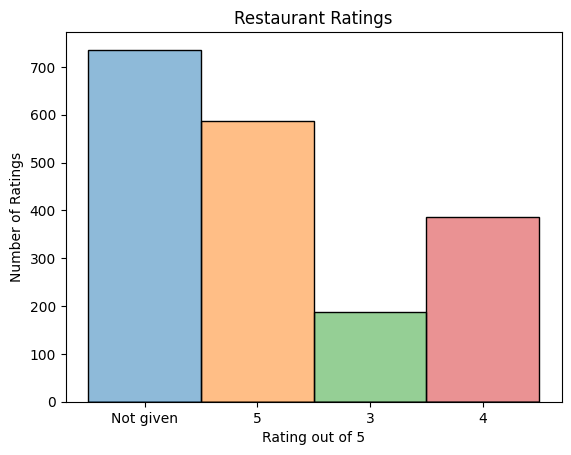

In [41]:
# Write the code here
sns.histplot(data=df, x='rating', hue="rating", legend=False)
plt.title('Restaurant Ratings')
plt.xlabel('Rating out of 5')
plt.ylabel('Number of Ratings');

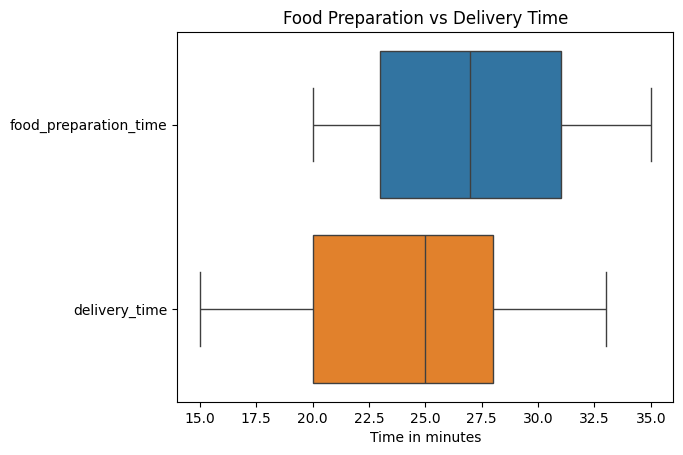

In [14]:
sns.boxplot(data=df[['food_preparation_time', 'delivery_time']], orient='h')
plt.title('Food Preparation vs Delivery Time')
plt.xlabel('Time in minutes');

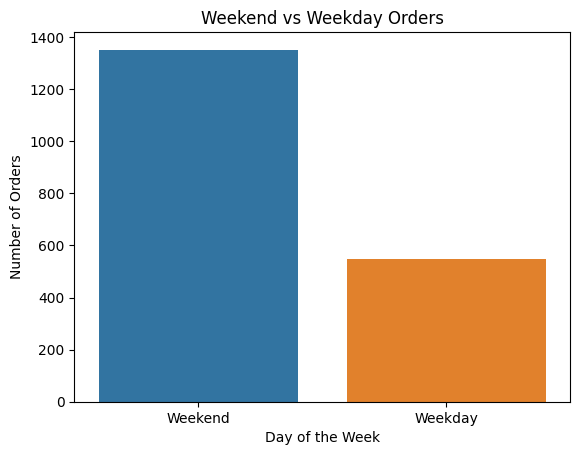

In [42]:
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week')
plt.title('Weekend vs Weekday Orders')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders');

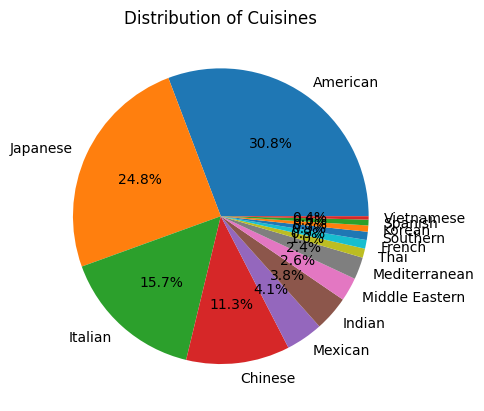

In [82]:
cuisine_counts = df['cuisine_type'].value_counts()
plt.pie(cuisine_counts, labels = cuisine_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Cuisines');

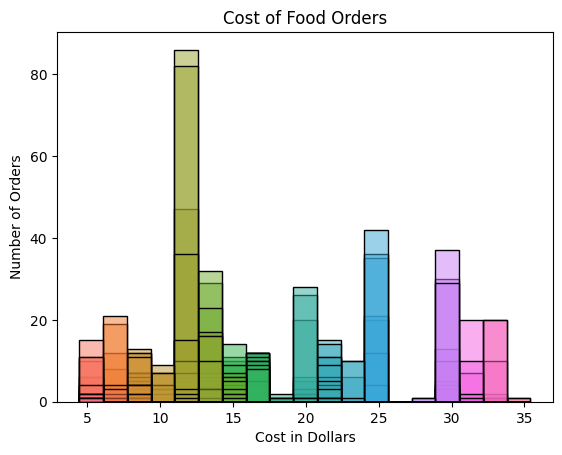

In [104]:
sns.histplot(data=df, x='cost_of_the_order', palette='husl', hue='cost_of_the_order', legend=False)
plt.title('Cost of Food Orders')
plt.xlabel('Cost in Dollars')
plt.ylabel('Number of Orders');

###Observations:
**1. Restaurant Ratings Histogram:** I chose a histogram to analyse the frequence distribution of the ratings of the various restaurant as this is numerical data. We are able to see the majority of the restaurants were not given a rating. The good news is that there are no ratings under 3 stars and of the restaurants that were ranked, the majority also have 5 stars.

**2. Food Preparation vs Delivery Time Boxplots:** I chose a boxplot to look at the time it takes for the restaurants to prepare the food and the time it takes for the food to ultimately be delivered as it is an easy way to see if there are any outliers. We can observe that delivery time seems to have an outlier on each end. This could mean there are a few deliveries that are far from the restaurants, which is okay to keep. Additionally, it is safe to say it can be observed that both graphs are generally equally distributed, maybe delivery time being slightly left-skewed per the median. Additionally, a box-and-whisker plot is one of the best ways to visualize the 5 number summary, and we can observe the median, 25th, and 75th percentiles, one note to make is that the IQR for both measurments is 8 minutes.

**3. Weekday vs Weekend Orders Count Plot:** In exploring the distribution of orders made between Mondays through Fridays and Saturdays and Sundays, it can be observed that there is a strikingly higher amount of orders placed on the weekends. Sitting at almost double the number, more weekend orders can be expected as people want to enjoy their weekends, or they may be indulging in cravings.

**4. Distribution of Cuisines Pie Chart:** In exploring the various cuisines FoodHub offers delivery from, I chose to represent this data in the form of a pie chart, as it is a good way to see the proportion of different 'flavors' so to speak of a categorical variable. Definetly not evenly distributed, we can see the most popular cuisine being American, followed by Japanese, Italian, and Chinese. After these big 4, the remainder of the cuisines really don't take up much of the chart as they are only reported to be a single digit. This could be for a variety of reasons, most likely being what restaurants are avaliable and in a business agreement with FoodHub, or what is avaliable in the New York area.

**5. Cost of Food Orders Histogram:** As the cost of food orders is a numerical value, I plotted a histogram to study the frequency distribution of these numbers. It is not surprising to see no uniform distribution as the size of the orders and the food options are not all fast food, so prices will definetly vary. The data appears almost bimodal but with more of a skew to the right. We see an overwhelmingly large majority of orders costing around 10 to 15 dollars , and then another bump in data at the 25 and 30 dollar price points.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [133]:
df['number_of_orders'] = df.groupby('order_id')['order_id'].transform('count')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,number_of_orders
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,1
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,1
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1


In [135]:
# Write the code here
top_five = df.groupby('restaurant_name')['number_of_orders'].sum()
top_five=top_five.sort_values(ascending=False)
most_pop = 5
print(f'Top {most_pop} Most Popular Restaurants:')
print(top_five.head(most_pop))

Top 5 Most Popular Restaurants:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: number_of_orders, dtype: int64


#### Observations:
To tackle this question, I first found that it would be helpful to have a column of just number of orders. I inlcuded .head to check for the new column. Then I used the .groupby function, and grouped restaurant name with number of orders, finding that Shake Shack is the most popular restaurant, followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and then lastly at spot 5 is Parm. This follows our previous observations that the most popular cuisine is American, and this could be the case as American menus generally tend to be broad in their options.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [248]:
# Write the code here
best_cuisine_weekend = df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['number_of_orders'].sum()
most_popular_cuisine = best_cuisine_weekend.idxmax()
print(f'Most Popular Cuisine on the Weekend: {most_popular_cuisine}')

Most Popular Cuisine on the Weekend: American


#### Observations:
It can be observed that the most popular cuisine on the weekends is American, with a total of 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [247]:
# Write the code here
expensive_orders = (len(df[df['cost_of_the_order'] > 20]) / len(df)) * 100
print(f'Percentage of orders costing more than $20: {expensive_orders:.2f}%')

Percentage of orders costing more than $20: 29.24%


#### Observations:
This is great, because less than 30 percent of orders cost over 20 dollars, which is wonderful considering the wide range of cuisines and meals such as breakfast, lunch, and dinner. Moreso, some competitor apps include a high surcharge for delivery which is a quick way to lose customers. This means that about 70 percent of the orders are less than 20 dollars, which is a very affordable value, especially compared to going to a restaurant and having a meal, then including a tip.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [141]:
# Write the code here
delivery_time_info = df['delivery_time'].describe()
print(delivery_time_info)

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


#### Observations:
Using the five number summary, it can be observed that the mean order delivery time averages at 24.16 minutes. This is not too long for the customer to wait, but there is a risk that the food could get cold, so it may be beneficial to see how to decrease the delivery time, thus presenting the customer with optimal food temperature, enhancing customer experience.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [143]:
# Write the code here
top_three = df.groupby('customer_id').size().sort_values(ascending=False).head(3)
print(top_three)

customer_id
52832    13
47440    10
83287     9
dtype: int64


#### Observations:
The top 3 customers are ID's 52832, 47440, and 83287. These loyal customers deserving of a 20% discount achieved the top 3 spots by ordering 13, 10, and 9 times respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


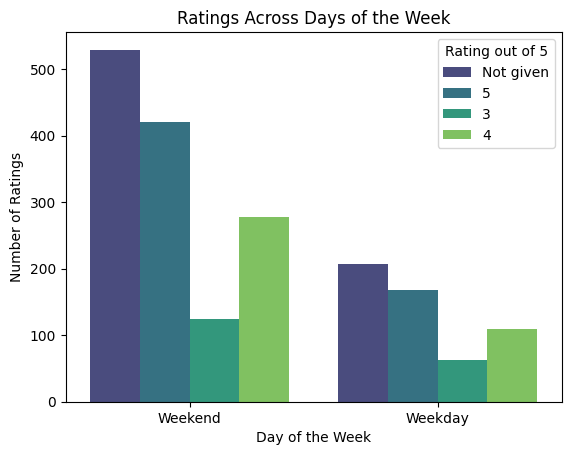

In [197]:
# Write the code here
sns.countplot(x='day_of_the_week', hue='rating', data=df, order=['Weekend', 'Weekday'], palette='viridis')
plt.title('Ratings Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Ratings')
plt.legend(title='Rating out of 5');

###Observations
**Ratings Across Days of the Week Count Plot:** There are many more ratings given on the weekend than the weekday. This could be related to the number of orders actually placed, as the the most orders anyways go unreviewed. Customers probably have more time on the weekend to leave a review. Additionally, there are higher ratings on the weekends too, as seen by the difference in 3 star vs 4 star ratings on weekdays vs weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [235]:
# Write the code here
filtered_restaurants = df[df['rating'] != 'Not given'].copy()
filtered_restaurants.loc['rating_num'] = pd.to_numeric(filtered_restaurants['rating'], errors='coerce')
rating_counts = filtered_restaurants['restaurant_name'].value_counts()
popular_restaurants = filtered_restaurants[filtered_restaurants['restaurant_name'].isin(rating_counts[rating_counts > 50].index)]
mean_ratings = popular_restaurants.groupby('restaurant_name')['rating'].mean()
best_rated_restaurants = mean_ratings[mean_ratings > 4]
print(best_rated_restaurants.head())

restaurant_name
Blue Ribbon Fried Chicken     5.552274e+61
Blue Ribbon Sushi             6.089773e+70
Shake Shack                  4.177018e+130
The Meatball Shop             6.494697e+81
Name: rating, dtype: float64


#### Observations:
It can be observed that there are only 4 restaurants which meet the company criteria for their promotional offer. These four restaurants, Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop, have more than 50 ratings and an average rating of more than 4. This was accomplished by filtering the rating column to only get number ratings: 3, 4, and 5. As this is now all numeric, I converted the column to numerical values, which I then filtered by the restaurants that have more than 50 ratings. Since we are working with numbers, I took the averages, specifically more than 4, and saw that these are the big four.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [236]:
def calculate_revenue(cost):
    if cost > 20:
        return 0.25 * cost
    elif cost > 5:
        return 0.15 * cost
    else:
        return 0

df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
total_revenue = df['revenue'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $6166.30


#### Observations:
The total revenue off all orders greater than 20 dollars and greater than 5 dollars with adjusted percent charges comes out to be 6,166.30 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [240]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
long_orders = df[df['total_time'] > 60]
percent_long_orders = (len(long_orders) / len(df)) * 100
print(f'Percent of orders with delivery time > 60 minutes: {percent_long_orders:.2f}%')

Percent of orders with delivery time > 60 minutes: 10.54%


#### Observations:
An hour is quite a long time from the time the order is placed until it is delivered. Yes, we must account for the business of the restaurant especially during peak hours, the number of staff, how long it takes until the food is actually begun being prepared after order is placed, the distance between restaurant and final delivery destination, and the varying traffic between restaurant and delivery address, BUT for if it takes longer than an hour, this may be a factor affecting rating and overall customer experience. I am happy to report only 10.54 percent of orders fall under this category.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [244]:
# Write the code here
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print(mean_delivery_time)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
As previously observed, there are more orders on the weekend. This being said, the deliverers are doing a great job of keeping the averages pretty similar across the week regardless. This is a good sign because traffic can and will for sure affect these numbers. Deliveries during both the weekday and weekend are under half an hour, specifically about 28 minutes Monday through Friday, and about 22 and a half minutes on Saturdays and Sundays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The restaurants featured on the FoodHub app are generally rated average to pretty high, as there is not a single restaurant rated lower than 3 out of 5. This means the restaurants are of high quality orr just fan favorites.
* FoodHub features a good variety of cuisine to cater to a diverse audience as well as the diverse cravings of the New York population.
* There was no missing data, so the app is doing a good job of collecting and reporting data.
* I noticed the company values shining as all the variables collected offer good insight into features and points directly affecting the customer. It is critical to not only get customer feedback, but also have data at the ready for things such as delivery time vs prep time. Fresh food delivered fast will definetly make for happier customers.
* The promotional ideas sound like they will be a hit while also still making good revenue for FoodHub.

### Recommendations:

*  In order to keep ratings high and increase the number of ratings to begin with, we should try to incentivize customers to leave reviews on their delivery food experience. Maybe some sort of FoodHub rewards system, a small discount on their next order, or a loyalty streak if they not only leave a review but continue ordering from the app or specific restaurant.
* Though there is a wide range of cuisine options, the overwhelming majority is American cuisine, so it will be beneficial to have more __ cuisine as it has some of the highest ratings.
* In order to continue catering to the hectic lifestyle of FoodHub's customers, it would be beneficial to incentivize the restaurants and delivery employees themselves to prepare and deliver the food faster, as this could lead to customers eating fresher food, positively contributing to their experience. One way to do this is to offer specials in revenue percents maybe quarterly. If a restaurant shows good faith in faster preperation, FoodHub can adjust their revenue rate for some time, thus happier customers and also encouraging faster food to be sent out and more time for more customers.

---